## Dissertation Project - Application of Machine Learning in Sustainable Manufacturing Supply Chain

### This Notebook has the code for Data Collection, Data Pre-processing and Data Visualization

### Project Scope:
Under this project, we are analyzing the flight data for specific Airbus aircrafts A300-600ST(know as BelugaST) and A330-700XL (known as BelugaXL). These aircraft transport various Airbus parts between different production centres and final assembly lines across Europe. With this data we can calculate the Scope 01 and Scope 03 emission across the Airbus supply chain and do prediction using Machine Learning Algorithms.

### Dataset

For this project, flight data from OpenSky Network is used. This dataset has flight data of all the flights across the world segregated into month wise from Jan-2019 to June-2022. Each month has approx 1-2 million rows of flight data.

The OpenSky Network is a non-profit association based in Switzerland. It aims at improving the security, reliability and efficiency of the air space usage by providing open access of real-world air traffic control data to the public. The OpenSky Network consists of a multitude of sensors connected to the Internet by volunteers, industrial supporters, and academic/governmental organizations. All collected raw data is archived in a large historical database. The database is primarily used by researchers from different areas to analyse and improve air traffic control technologies and processes.


OpenSky Network : https://opensky-network.org/

Dataset Link: https://zenodo.org/record/6797232#.YuhWVnbMK39

This data has flight origin and destination in ICAO Airport Code, hence this code must be converted into City and Country of the airport, for this the dataset from Our Airports is used. 

Link: https://ourairports.com/

Note: To get the final processed data, some steps are carried in this Notebook and some are carried in excel spreadsheet, this is for optimizing the CO2 emission calculation.



In [3]:
# Necessary libraries import
import pandas as pd
import datetime
import os, shutil, pathlib, fnmatch

#Various functions are created for Data collection and pre-processing 
def read_and_process(flight_data_file):
    '''
    In this function only necessary columns are selected from the dataset.
    Then from the dataset only necessary data is taken with function filtered_flight_data and finally data is 
    inserted into a list.
    '''
    flight_data = pd.read_csv(flight_data_file, usecols = ['callsign', 'icao24','registration', 'typecode', 'origin', 
                                                            'destination', 'day'])
    flight_data = filtered_flight_data(flight_data)
    data_frame_list_2022.append(flight_data)
    
    return

def filtered_flight_data(input_data):
    '''
    In this function the input data is taken and the day format is changed to datetime and only ICAO24 codes related 
    to A3ST and A337 aircraft are filtered.
    '''
    flight_data = input_data
    flight_data.day = pd.to_datetime(flight_data.day)
    flight_data = flight_data.loc[flight_data.icao24.isin(['394a60', '394a61', '394a62', '394a63',
                                                          '394a65', '395d67', '395d68',
                                                          '395d69', '38fcbb'])]
    return flight_data

def process_flight_data_folder(filepath, pattern: str = '*'):
    '''
    In this function using a for loop to iterate through each file then function read_and_process is used to read files.
    Next, using function move_files_to_processed, the files are moved to a separate folder 'processed'.
    '''
    for filename in fnmatch.filter(os.listdir(filepath), pattern):
        read_and_process(filepath + "\\" + filename)
        print(filename + " processed")
    move_files_to_processed(filepath)
    return

def move_dir(src: str, dst: str, pattern: str = '*'):
    '''
    In this function files are moved to the designated folder.
    '''
    if not os.path.isdir(dst):
        pathlib.Path(dst).mkdir(parents=True, exist_ok=True)
    for f in fnmatch.filter(os.listdir(src), pattern):
        shutil.move(os.path.join(src, f), os.path.join(dst, f))
        
def move_files_to_processed(filepath):
    '''
    In this function select the filepath and folder and call out function move_dir to move the files.    
    '''
    move_to = filepath + "processed\\"
    move_dir(filepath, move_to, '*.csv' )
    print("Moved files successfully to " + move_to)
    return


In [4]:
#Run this code for every new file placed into the designated filepath.

data_frame_list_2022 = []

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
startTime = datetime.now()

filepath = "E:\\IGP DATA MIGRATION\\"
flights_filepath = filepath + 'flight_data/'

process_flight_data_folder(flights_filepath,'*.csv')

print ('Time taken to process this code :', datetime.now() - startTime)

flightlist_20190101_20190131.csv processed
flightlist_20190201_20190228.csv processed
flightlist_20190301_20190331.csv processed
flightlist_20190401_20190430.csv processed
flightlist_20190501_20190531.csv processed
flightlist_20190601_20190630.csv processed
flightlist_20190701_20190731.csv processed
flightlist_20190801_20190831.csv processed
flightlist_20190901_20190930.csv processed
flightlist_20191001_20191031.csv processed
flightlist_20191101_20191130.csv processed
flightlist_20191201_20191231.csv processed
flightlist_20200101_20200131.csv processed
flightlist_20200201_20200229.csv processed
flightlist_20200301_20200331.csv processed
flightlist_20200401_20200430.csv processed
flightlist_20200501_20200531.csv processed
flightlist_20200601_20200630.csv processed
flightlist_20200701_20200731.csv processed
flightlist_20200801_20200831.csv processed
flightlist_20200901_20200930.csv processed
flightlist_20201001_20201031.csv processed
flightlist_20201101_20201130.csv processed
flightlist_

In [5]:
#All the processed files that are in list data_frame_list_2022 are concatenated into new variable.

Beluga_flight_data_combined = pd.concat(data_frame_list_2022, axis=0)

#From the day variable a new variable date is created and set in datetime format and the day variable is deleted.
Beluga_flight_data_combined.day = pd.to_datetime(Beluga_flight_data_combined.day)
Beluga_flight_data_combined['date'] = pd.to_datetime(Beluga_flight_data_combined["day"]).dt.date
Beluga_flight_data_combined.date = pd.to_datetime(Beluga_flight_data_combined.date)
del Beluga_flight_data_combined['day']

# The new date variable is moved to first position in the dataset
cols = Beluga_flight_data_combined.columns.tolist()
cols = [cols[-1]] + cols[:-1]
Beluga_flight_data_combined = Beluga_flight_data_combined[cols]


In [17]:
#To check the datatypes of the dataset
Beluga_flight_data_combined.dtypes

date            datetime64[ns]
callsign                object
icao24                  object
registration            object
typecode                object
origin                  object
destination             object
dtype: object

In [18]:
#The dataset is stored into an Excel so that Longitude/Latitude, airport name, city, country name can be 
#added to each origin and destination airport for calculating the distance. This data is taken from https://ourairports.com/.
#P.S.: The data is stored in excel for adding other details is because of ease of doing it.

Beluga_flight_data_combined.to_excel("Beluga_flight_data_combined.xlsx", index=False)

In [19]:
#After adding the necessary addtional details the dataset is read and stored into new variable
Beluga_flight_data_cmbdist = pd.read_excel("Beluga_flight_data_combined.xlsx")

In [22]:
# The size of the new dataset, it now has 19 columns as compared to original data with only 7 columns
Beluga_flight_data_cmbdist.shape

(11321, 19)

In [23]:
# Null are deleted from the dataset
Beluga_flight_data_cmbdist = Beluga_flight_data_cmbdist.dropna()

In [24]:
#New size of the dataset
Beluga_flight_data_cmbdist.shape

(9622, 19)

In [25]:
#To make sure that there are no null vaules
Beluga_flight_data_cmbdist.isna().sum()

date             0
callsign         0
icao24           0
registration     0
typecode         0
origin           0
org_airport      0
org_country      0
org_city         0
org_iata_code    0
org_lat          0
org_longit       0
destination      0
dst_airport      0
dst_country      0
dst_city         0
dst_iata_code    0
dst_lat          0
dst_longit       0
dtype: int64

In [26]:
# Dataset with all the necessary data added from the ourairports data.
Beluga_flight_data_cmbdist.head()

,date,callsign,icao24,registration,typecode,origin,org_airport,org_country,org_city,org_iata_code,org_lat,org_longit,destination,dst_airport,dst_country,dst_city,dst_iata_code,dst_lat,dst_longit
0,2019-01-02,BGA114D,394a63,F-GSTD,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.36382,EGNR,Hawarden Airport,United Kingdom,Hawarden,CEG,53.178101,-2.977780
1,2019-01-02,BGA113C,394a62,F-GSTC,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.36382,EDHI,Hamburg-Finkenwerder Airport,Germany,Hamburg,XFW,53.535278,9.835556
2,2019-01-02,BGA214F,394a65,F-GSTF,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.36382,EGNR,Hawarden Airport,United Kingdom,Hawarden,CEG,53.178101,-2.977780
3,2019-01-02,BGA314A,394a60,F-GSTA,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.36382,EGNR,Hawarden Airport,United Kingdom,Hawarden,CEG,53.178101,-2.977780
4,2019-01-02,BGA141D,394a63,F-GSTD,A3ST,EGNR,Hawarden Airport,United Kingdom,Hawarden,CEG,53.178101,-2.97778,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.363820


In [27]:
#Since we now have the origin/destination latitude/longitude, we can now calculate the distance between two airports with
#Haversine formula
#Below code modified accordingly and reference taken from: 
#https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = round(6371 * c) #To get the distance in kilometers we have to multiple with 6371, that is the radius of earth.
    return km

In [29]:
# Using Haversine function the distance between two GPS points is added.
for index, row in Beluga_flight_data_cmbdist.iterrows():
    Beluga_flight_data_cmbdist.loc[index, 'distance'] = haversine(row['org_longit'], row['org_lat'], row['dst_longit'], row['dst_lat'])

In [30]:
#Now we have distance column added
Beluga_flight_data_cmbdist.head()

,date,callsign,icao24,registration,typecode,origin,org_airport,org_country,org_city,org_iata_code,org_lat,org_longit,destination,dst_airport,dst_country,dst_city,dst_iata_code,dst_lat,dst_longit,distance
0,2019-01-02,BGA114D,394a63,F-GSTD,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.36382,EGNR,Hawarden Airport,United Kingdom,Hawarden,CEG,53.178101,-2.977780,1109.0
1,2019-01-02,BGA113C,394a62,F-GSTC,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.36382,EDHI,Hamburg-Finkenwerder Airport,Germany,Hamburg,XFW,53.535278,9.835556,1264.0
2,2019-01-02,BGA214F,394a65,F-GSTF,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.36382,EGNR,Hawarden Airport,United Kingdom,Hawarden,CEG,53.178101,-2.977780,1109.0
3,2019-01-02,BGA314A,394a60,F-GSTA,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.36382,EGNR,Hawarden Airport,United Kingdom,Hawarden,CEG,53.178101,-2.977780,1109.0
4,2019-01-02,BGA141D,394a63,F-GSTD,A3ST,EGNR,Hawarden Airport,United Kingdom,Hawarden,CEG,53.178101,-2.97778,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.363820,1109.0


In [43]:
#To have versions existing flight data copied into new variable
final_beluga_flight_data = Beluga_flight_data_cmbdist.head()

,date,callsign,icao24,registration,typecode,origin,org_airport,org_country,org_city,org_iata_code,org_lat,org_longit,destination,dst_airport,dst_country,dst_city,dst_iata_code,dst_lat,dst_longit,distance
0,2019-01-02,BGA114D,394a63,F-GSTD,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.36382,EGNR,Hawarden Airport,United Kingdom,Hawarden,CEG,53.178101,-2.977780,1109.0
1,2019-01-02,BGA113C,394a62,F-GSTC,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.36382,EDHI,Hamburg-Finkenwerder Airport,Germany,Hamburg,XFW,53.535278,9.835556,1264.0
2,2019-01-02,BGA214F,394a65,F-GSTF,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.36382,EGNR,Hawarden Airport,United Kingdom,Hawarden,CEG,53.178101,-2.977780,1109.0
3,2019-01-02,BGA314A,394a60,F-GSTA,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.36382,EGNR,Hawarden Airport,United Kingdom,Hawarden,CEG,53.178101,-2.977780,1109.0
4,2019-01-02,BGA141D,394a63,F-GSTD,A3ST,EGNR,Hawarden Airport,United Kingdom,Hawarden,CEG,53.178101,-2.97778,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,43.629101,1.363820,1109.0


In [44]:
#Data further filtered to select only specific airports that has Airbus final assembly lines and production centers
final_beluga_flight_data = Beluga_flight_data_cmbdist.loc[Beluga_flight_data_cmbdist.destination.isin
                                                          (['LFBO', 'EDHI', 'EGNR', 'LEGT', 'LFRS', 
                                                            'EDDW', 'ETSI', 'LFRZ', 'LEZL'])]

#There were some instance where the distance was zero, hence deleted those rows
final_beluga_flight_data.drop(final_beluga_flight_data[final_beluga_flight_data.distance ==0].index, inplace=True)

In [53]:
#For further processing data copied into excel
final_beluga_flight_data.to_excel("final_beluga_flight_data.xlsx", index=False)

In [4]:
# Now we have the final processed data, that now includes the Scope 01 and Scope 03 emission along with total emission.
data = pd.read_csv("C:\\Users\\Abhishek Bhadwankar\\OneDrive - UWE Bristol\\Desktop\\UWE STUDIES\\Modules\\Master Project\\DataSet\\Final Data\\airbus_transport_emission_data.csv")

In [9]:
#Final dataset
display(data.head())

#Dataset size
display(data.shape)

#Dataset information
display(data.info())

,date,callsign,icao24,registration,typecode,origin,org_airport,org_country,org_city,org_iata_code,...,distance,GCD-uplift_factor,final_distance,flight_mode,payload_capacity(tonnes),load_factor,tonne-km,scope_01_emission_TTW,scope_03_emission_WTT,total_emission_WTW
0,2019-01-02,BGA114D,394a63,F-GSTD,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,...,1109,88.72,1197.72,Short-haul,40,28.56,34206.8832,78.754165,8.623555,87.37772
1,2019-01-02,BGA113C,394a62,F-GSTC,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,...,1264,101.12,1365.12,Long-haul,40,29.40,40134.5280,40.893071,4.477809,45.37088
2,2019-01-02,BGA214F,394a65,F-GSTF,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,...,1109,88.72,1197.72,Short-haul,40,28.56,34206.8832,78.754165,8.623555,87.37772
3,2019-01-02,BGA314A,394a60,F-GSTA,A3ST,LFBO,Toulouse-Blagnac Airport,France,Toulouse/Blagnac,TLS,...,1109,88.72,1197.72,Short-haul,40,28.56,34206.8832,78.754165,8.623555,87.37772
4,2019-01-02,BGA141D,394a63,F-GSTD,A3ST,EGNR,Hawarden Airport,United Kingdom,Hawarden,CEG,...,1109,88.72,1197.72,Short-haul,40,28.56,34206.8832,78.754165,8.623555,87.37772


(8982, 29)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      8982 non-null   object 
 1   callsign                  8982 non-null   object 
 2   icao24                    8982 non-null   object 
 3   registration              8982 non-null   object 
 4   typecode                  8982 non-null   object 
 5   origin                    8982 non-null   object 
 6   org_airport               8982 non-null   object 
 7   org_country               8982 non-null   object 
 8   org_city                  8982 non-null   object 
 9   org_iata_code             8982 non-null   object 
 10  org_lat                   8982 non-null   float64
 11  org_longit                8982 non-null   float64
 12  destination               8982 non-null   object 
 13  dst_airport               8982 non-null   object 
 14  dst_coun

None

### Exploratory Data Analysis (EDA) & Data Visualisation

In [42]:
# To find the Summary Statistics of the dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
org_lat,8982.0,48.062166,5.166043,37.417999,43.629101,47.310556,53.178101,58.876701
org_longit,8982.0,2.644181,5.220412,-8.924820,-2.977780,1.363820,9.835556,32.565601
dst_lat,8982.0,48.297289,5.017542,37.417999,43.629101,47.153198,53.178101,53.535278
dst_longit,8982.0,2.447674,5.226921,-5.893110,-2.977780,1.363820,9.835556,11.534000
distance,8982.0,945.090403,333.773601,88.000000,561.000000,1076.000000,1264.000000,2599.000000
GCD-uplift_factor,8982.0,75.607232,26.701888,7.040000,44.880000,86.080000,101.120000,207.920000
final_distance,8982.0,1020.697635,360.475489,95.040000,605.880000,1162.080000,1365.120000,2806.920000
payload_capacity(tonnes),8982.0,40.613004,2.253622,26.000000,40.000000,40.000000,40.000000,44.000000
load_factor,8982.0,27.952814,3.460673,19.110000,28.560000,28.560000,29.400000,32.340000
tonne-km,8982.0,29192.021074,11486.918843,1916.006400,17303.932800,34206.883200,40134.528000,62519.688000


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# display plots in the notebook itself
%matplotlib inline

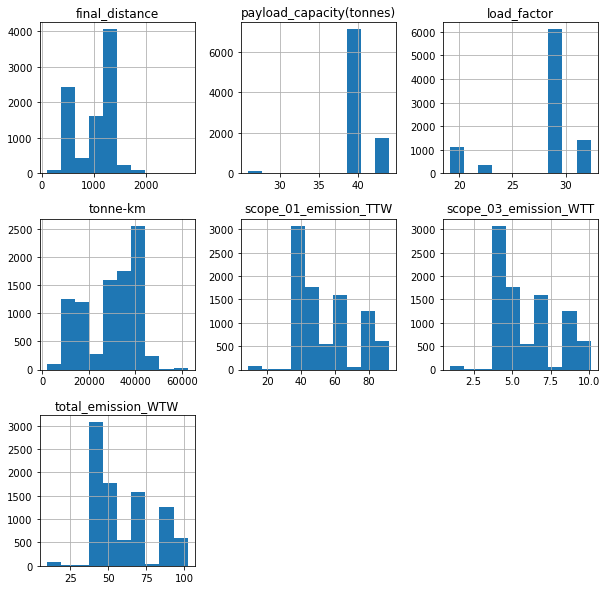

In [14]:
#Only selected features from the dataset are selected as others are not necessary

data_subset = data[['final_distance','payload_capacity(tonnes)','load_factor', 'tonne-km', 'scope_01_emission_TTW', 'scope_03_emission_WTT', 'total_emission_WTW']]

# Histogram of each feature
data_subset.hist(bins=10,figsize=(10,10))
plt.show()



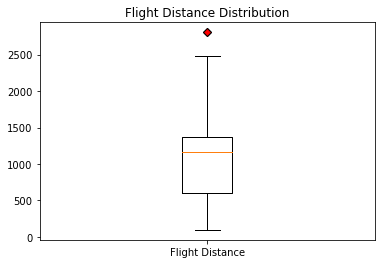

In [44]:
# To see the outlier in the final distance
data_boxplt = data[['final_distance']]

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# set title
plt.title('Flight Distance Distribution')

# make the boxplot
plt.boxplot(data_boxplt.values, labels=['Flight Distance'], flierprops=red_diamond);

flight_mode
Domestic       493.723395
Long-haul     1410.568969
Short-haul     951.321293
Name: final_distance, dtype: float64

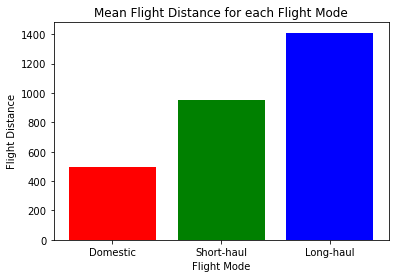

In [47]:
# Mean flight distance by each flight mode
dist_flight_mode = data.groupby('flight_mode').final_distance.mean()

display(dist_flight_mode)

# sort by distance
dist_flight_mode.sort_values(inplace=True)

x = dist_flight_mode.index.tolist()
y = dist_flight_mode.values.tolist()

# set axis labels
plt.xlabel('Flight Mode')
plt.ylabel('Flight Distance')

# set title
plt.title('Mean Flight Distance for each Flight Mode')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.bar(x, y, color=['red', 'green', 'blue']);

In [15]:
#Correlation Matrix to see the correlation between the features
data_subset.corr()

,final_distance,payload_capacity(tonnes),load_factor,tonne-km,scope_01_emission_TTW,scope_03_emission_WTT,total_emission_WTW
final_distance,1.000000,-0.208514,0.529643,0.966100,0.207286,0.207504,0.207308
payload_capacity(tonnes),-0.208514,1.000000,0.381236,0.005935,0.238232,0.238188,0.238227
load_factor,0.529643,0.381236,1.000000,0.701073,0.253586,0.253911,0.253618
tonne-km,0.966100,0.005935,0.701073,1.000000,0.236388,0.236638,0.236413
scope_01_emission_TTW,0.207286,0.238232,0.253586,0.236388,1.000000,1.000000,1.000000
scope_03_emission_WTT,0.207504,0.238188,0.253911,0.236638,1.000000,1.000000,1.000000
total_emission_WTW,0.207308,0.238227,0.253618,0.236413,1.000000,1.000000,1.000000


<AxesSubplot:>

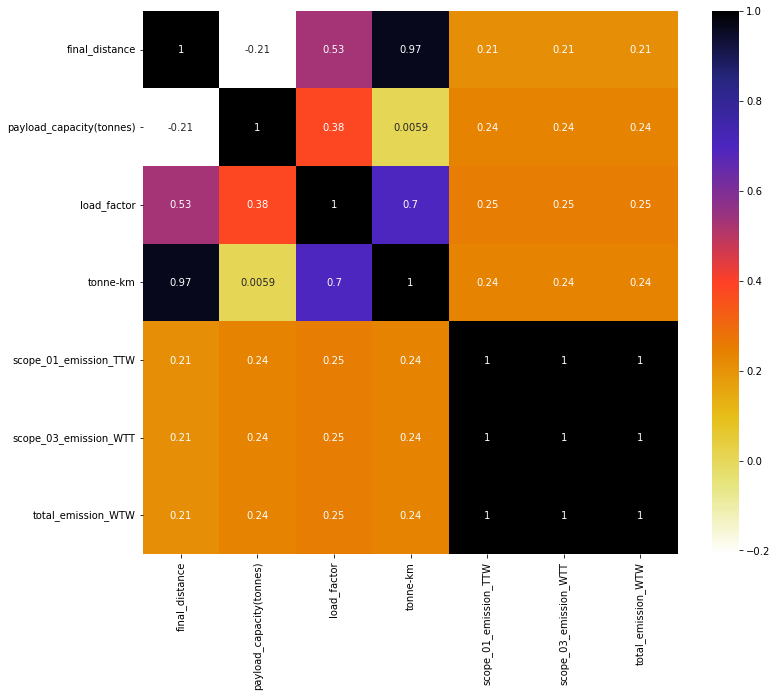

In [16]:
#Plotting HeatMap to see correlation matrix
plt.figure(figsize=(12,10))
cor = data_subset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)